# Nice Ride Analysis Notebook

### Import data and set up for working

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st

In [2]:
#Import data

csv_path = "Resources/Nice_ride_trip_history_"
year_2015 = pd.read_csv(f"{csv_path}2015_season.csv", low_memory=False)
year_2016 = pd.read_csv(f"{csv_path}2016_season.csv", low_memory=False)
year_2017 = pd.read_csv(f"{csv_path}2017_season.csv", low_memory=False)
year_2018 = pd.read_csv(f"{csv_path}2018_season.csv", low_memory=False)
year_2019 = pd.read_csv(f"{csv_path}2019_season.csv", low_memory=False)
year_2020 = pd.read_csv(f"{csv_path}2020_season.csv", low_memory=False)

In [3]:

# Create initial Data Frames
# 2015
df_2015 = pd.DataFrame(year_2015)
df_2015.head() # start date 4/1/2015

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type
0,2015-04-01 08:00:00,Midtown Exchange,30008,2015-04-01 08:01:00,Midtown Exchange,30008,61,Member
1,2015-04-01 08:33:00,2nd Street N & 8th Ave. N,30092,2015-04-01 08:46:00,11th Street & Hennepin,30004,771,Member
2,2015-04-01 08:36:00,2nd Street N & 8th Ave. N,30092,2015-04-01 08:45:00,Hennepin Ave & 4th Street,30055,522,Member
3,2015-04-01 08:46:00,North 2nd Street & 4th Ave N,30011,2015-04-01 08:57:00,10th Street & Nicollet Mall,30039,679,Member
4,2015-04-01 08:56:00,Coffman Union,30024,2015-04-01 09:01:00,Riverside Ave & 23rd Ave S,30002,285,Member


In [4]:
df_2015.tail() # end date 11/1/2015

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type
483224,2015-11-01 21:54:00,YWCA Downtown,30006,2015-11-01 22:44:00,YWCA Downtown,30006,3037,Casual
483225,2015-11-01 21:54:00,Lyndale Ave S & 22nd Street,30017,2015-11-01 21:55:00,Lyndale Ave S & 22nd Street,30017,65,Member
483226,2015-11-01 21:55:00,4th Street & 13th Ave SE,30009,2015-11-01 22:05:00,Logan Park,30104,565,Casual
483227,2015-11-01 21:55:00,West 15th Street & Willow,30093,2015-11-01 22:12:00,Nicollet Island,30170,980,Member
483228,2015-11-01 21:55:00,West 15th Street & Willow,30093,2015-11-01 22:12:00,Nicollet Island,30170,983,Member


In [5]:
# 2015 Fix dtypes

df_2015.start_datetime = pd.to_datetime(df_2015.start_datetime)
df_2015.end_datetime = pd.to_datetime(df_2015.end_datetime)
df_2015.start_station_name = df_2015.start_station_name.astype(str)
df_2015.end_station_name = df_2015.end_station_name.astype(str)
df_2015.account_type = df_2015.account_type.astype(str)
df_2015.start_station_id = df_2015.start_station_id.astype(str)
df_2015.end_station_id = df_2015.end_station_id.astype(str)

df_2015.dtypes

start_datetime        datetime64[ns]
start_station_name            object
start_station_id              object
end_datetime          datetime64[ns]
end_station_name              object
end_station_id                object
total_duration_sec             int64
account_type                  object
dtype: object

In [6]:
# 2016
df_2016 = pd.DataFrame(year_2016)
df_2016.head() # start date 4/4/2016

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type
0,2016-04-04 08:50:00,Midtown Exchange,30008,2016-04-04 08:52:00,Midtown Exchange,30008,84,Member
1,2016-04-04 09:35:00,Washington & Marquette,30028,2016-04-04 09:51:00,Social Sciences,30019,952,Member
2,2016-04-04 10:12:00,West 15th Street & Willow,30093,2016-04-04 10:14:00,West 15th Street & Willow,30093,104,Member
3,2016-04-04 10:14:00,West 15th Street & Willow,30093,2016-04-04 10:19:00,11th Street & Hennepin,30004,292,Member
4,2016-04-04 10:19:00,Washington & Marquette,30028,2016-04-04 10:33:00,Elliot Hall,30058,870,Member


In [7]:

df_2016.tail() # end date 11/6/2016

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type
432269,2016-11-06 21:52:00,11th Ave S & S 2nd Street,30154,2016-11-06 22:17:00,Malcolm Ave SE & 5th Street SE,30055,1496,Casual
432270,2016-11-06 21:52:00,11th Ave S & S 2nd Street,30154,2016-11-06 22:17:00,Malcolm Ave SE & 5th Street SE,30055,1494,Casual
432271,2016-11-06 21:52:00,11th Ave S & S 2nd Street,30154,2016-11-06 22:17:00,Malcolm Ave SE & 5th Street SE,30055,1504,Casual
432272,2016-11-06 21:53:00,Sanford Hall,30182,2016-11-06 21:59:00,McNamara Center,30057,315,Member
432273,2016-11-06 22:09:00,Willey Hall,30195,2016-11-06 22:14:00,McNamara Center,30057,325,Casual


In [8]:
# 2016 Fix dtypes

df_2016.start_datetime = pd.to_datetime(df_2016.start_datetime)
df_2016.end_datetime = pd.to_datetime(df_2016.end_datetime)
df_2016.start_station_name = df_2016.start_station_name.astype(str)
df_2016.end_station_name = df_2016.end_station_name.astype(str)
df_2016.account_type = df_2016.account_type.astype(str)
df_2016.start_station_id = df_2016.start_station_id.astype(str)
df_2016.end_station_id = df_2016.end_station_id.astype(str)

df_2016.dtypes

start_datetime        datetime64[ns]
start_station_name            object
start_station_id              object
end_datetime          datetime64[ns]
end_station_name              object
end_station_id                object
total_duration_sec             int64
account_type                  object
dtype: object

In [9]:
# 2017
df_2017 = pd.DataFrame(year_2017)
df_2017.head() # start date 4/3/2017

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,account_type,total_duration_sec
0,2017-04-03 09:19:00,Portland Ave & Washington Ave,30090,2017-04-03 09:25:00,Currie Park,30037,Member,361
1,2017-04-03 09:27:00,Marshall Street NE & 8th Ave NE,30098,2017-04-03 09:36:00,2nd Ave S & S 3rd Street,30050,Member,532
2,2017-04-03 09:41:00,2nd Ave S & S 3rd Street,30050,2017-04-03 10:13:00,Grant Street & Portland Ave,30087,Member,1887
3,2017-04-03 09:45:00,Grant Street & Portland Ave,30087,2017-04-03 09:50:00,Hennepin County Government Center,30029,Member,340
4,2017-04-03 09:46:00,Portland Ave & Washington Ave,30090,2017-04-03 09:55:00,4th Street S & 19th Ave,30027,Member,571


In [10]:
df_2017.tail() # end date 11/5/2017

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,account_type,total_duration_sec
460713,2017-11-05 21:38:00,South 2nd Street & 3rd Ave S,30030,2017-11-05 21:44:00,6th Ave SE & University Ave,30088,Member,370
460714,2017-11-05 21:41:00,Weisman Art Museum,30183,2017-11-05 22:05:00,22nd Ave S & Franklin Ave,30014,Casual,1399
460715,2017-11-05 21:43:00,Dale Street & Grand Ave.,30106,2017-11-05 22:13:00,N Milton Street & Summit Ave,30101,Member,1817
460716,2017-11-05 21:45:00,Broadway Street N & 4th Street E,30122,2017-11-05 22:26:00,Broadway Street N & 4th Street E,30122,Member,2513
460717,2017-11-05 21:45:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 22:02:00,Logan Park,30104,Member,1048


In [11]:
# 2017 Fix dtypes

df_2017.start_datetime = pd.to_datetime(df_2017.start_datetime)
df_2017.end_datetime = pd.to_datetime(df_2017.end_datetime)
df_2017.start_station_name = df_2017.start_station_name.astype(str)
df_2017.end_station_name = df_2017.end_station_name.astype(str)
df_2017.account_type = df_2017.account_type.astype(str)
df_2017.start_station_id = df_2017.start_station_id.astype(str)
df_2017.end_station_id = df_2017.end_station_id.astype(str)

df_2017.dtypes

start_datetime        datetime64[ns]
start_station_name            object
start_station_id              object
end_datetime          datetime64[ns]
end_station_name              object
end_station_id                object
account_type                  object
total_duration_sec             int64
dtype: object

In [12]:
# 2018
df_2018 = pd.DataFrame(year_2018)
df_2018.head() # start date 4/12/2018

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type
0,2490,2018-04-12 08:49:49.855,2018-04-12 09:31:20.522,10.0,Midtown Exchange,44.948590,-93.260200,45.0,Franklin & Portland,44.962841,-93.267521,Member,Classic
1,228,2018-04-12 09:29:22.149,2018-04-12 09:33:10.525,16.0,22nd Ave S & Franklin Ave,44.962930,-93.241042,49.0,Franklin & 28th Ave,44.962701,-93.230893,Member,Classic
2,80,2018-04-12 10:15:30.340,2018-04-12 10:16:51.143,21.0,Social Sciences,44.970639,-93.243552,209.0,Willey Hall,44.972404,-93.242891,Member,Classic
3,755,2018-04-12 11:02:00.775,2018-04-12 11:14:36.357,10.0,Midtown Exchange,44.948590,-93.260200,31.0,Hennepin County Government Center,44.976602,-93.266701,Member,Classic
4,850,2018-04-12 11:09:51.580,2018-04-12 11:24:02.195,18.0,Walker Art Center,44.967104,-93.289075,31.0,Hennepin County Government Center,44.976602,-93.266701,Member,Classic


In [13]:
df_2018.tail() # end date 11/17/2018

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type
412418,314,2018-11-17 20:53:18.470,2018-11-17 20:58:32.944,NaN,NaN,44.95,-93.28,NaN,NaN,44.96,-93.28,Casual,Dockless
412419,588,2018-11-17 21:06:47.418,2018-11-17 21:16:35.618,NaN,NaN,44.97,-93.24,NaN,NaN,44.99,-93.23,Casual,Dockless
412420,323,2018-11-17 21:47:30.035,2018-11-17 21:52:53.874,NaN,NaN,44.95,-93.29,NaN,NaN,44.95,-93.30,Casual,Dockless
412421,347,2018-11-17 23:13:49.125,2018-11-17 23:19:36.587,NaN,NaN,44.97,-93.23,NaN,NaN,44.98,-93.24,Casual,Dockless
412422,124464,2018-11-17 23:51:45.365,2018-11-19 10:26:09.952,NaN,NaN,44.96,-93.28,NaN,NaN,44.95,-93.28,Casual,Dockless


In [14]:
# 2018 Fix dtypes

df_2018.start_datetime = pd.to_datetime(df_2018.start_datetime)
df_2018.end_datetime = pd.to_datetime(df_2018.end_datetime)
df_2018.start_station_name = df_2018.start_station_name.astype(str)
df_2018.end_station_name = df_2018.end_station_name.astype(str)
df_2018.account_type = df_2018.account_type.astype(str)
df_2018.start_station_id = df_2018.start_station_id.astype(str)
df_2018.end_station_id = df_2018.end_station_id.astype(str)

df_2018.dtypes

total_duration_sec             int64
start_datetime        datetime64[ns]
end_datetime          datetime64[ns]
start_station_id              object
start_station_name            object
start_station_lat            float64
start_station_lng            float64
end_station_id                object
end_station_name              object
end_station_lat              float64
end_station_lng              float64
account_type                  object
bike_type                     object
dtype: object

In [15]:
# 2019
df_2019 = pd.DataFrame(year_2019)
df_2019.head() # start date 4/22/2019

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type
0,3568,2019-04-22 09:03:33.721,2019-04-22 10:03:02.667,188.0,Sanford Hall,44.980831,-93.240282,190.0,Weisman Art Museum,44.973428,-93.237319,Member,Classic
1,223,2019-04-22 09:35:15.017,2019-04-22 09:38:58.405,188.0,Sanford Hall,44.980831,-93.240282,190.0,Weisman Art Museum,44.973428,-93.237319,Member,Classic
2,563,2019-04-22 09:37:10.081,2019-04-22 09:46:33.891,94.0,Portland Ave & Washington Ave,44.978210,-93.260230,62.0,Elliot Hall,44.976850,-93.238180,Casual,Classic
3,10159,2019-04-22 09:50:10.687,2019-04-22 12:39:29.879,188.0,Sanford Hall,44.980831,-93.240282,188.0,Sanford Hall,44.980831,-93.240282,Member,Classic
4,407,2019-04-22 09:53:28.169,2019-04-22 10:00:16.034,94.0,Portland Ave & Washington Ave,44.978210,-93.260230,95.0,Gateway Park,44.982594,-93.267514,Casual,Classic


In [16]:
df_2019.tail() # end date 11/30/2019

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type
358702,708,2019-11-30 21:03:17.466,2019-11-30 21:15:06.273,NaN,NaN,44.98,-93.26,NaN,NaN,44.98,-93.26,Member,Dockless
358703,662,2019-11-30 22:00:37.126,2019-11-30 22:11:39.207,NaN,NaN,44.95,-93.32,NaN,NaN,44.95,-93.30,Member,Dockless
358704,658,2019-11-30 22:08:13.295,2019-11-30 22:19:12.128,NaN,NaN,44.98,-93.26,NaN,NaN,44.97,-93.26,Member,Dockless
358705,549,2019-11-30 23:15:00.528,2019-11-30 23:24:10.294,NaN,NaN,44.98,-93.23,NaN,NaN,44.98,-93.23,Member,Dockless
358706,276,2019-11-30 23:39:39.693,2019-11-30 23:44:16.229,NaN,NaN,44.98,-93.23,NaN,NaN,44.98,-93.23,Member,Dockless


In [17]:
# 2019 Fix dtypes

df_2019.start_datetime = pd.to_datetime(df_2019.start_datetime)
df_2019.end_datetime = pd.to_datetime(df_2019.end_datetime)
df_2019.start_station_name = df_2019.start_station_name.astype(str)
df_2019.end_station_name = df_2019.end_station_name.astype(str)
df_2019.account_type = df_2019.account_type.astype(str)
df_2019.start_station_id = df_2019.start_station_id.astype(str)
df_2019.end_station_id = df_2019.end_station_id.astype(str)

df_2019.dtypes

total_duration_sec             int64
start_datetime        datetime64[ns]
end_datetime          datetime64[ns]
start_station_id              object
start_station_name            object
start_station_lat            float64
start_station_lng            float64
end_station_id                object
end_station_name              object
end_station_lat              float64
end_station_lng              float64
account_type                  object
bike_type                     object
dtype: object

In [18]:
# 2020 
df_2020 = pd.DataFrame(year_2020)
df_2020.head() #start date 4/1/2020

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type,month,day
0,docked_bike,2020-04-01 13:47:57,2020-04-01 13:48:29,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
1,docked_bike,2020-04-01 13:48:56,2020-04-01 13:49:20,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
2,docked_bike,2020-04-01 13:49:36,2020-04-01 13:49:41,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
3,docked_bike,2020-04-01 13:52:59,2020-04-01 13:53:02,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
4,docked_bike,2020-04-01 13:53:21,2020-04-01 13:53:33,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1


In [19]:
df_2020.tail() #end date 11/4/2020

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type,month,day
229072,electric_bike,2020-11-04 21:53:05,2020-11-04 22:57:54,22nd Ave S & Franklin Ave,16.0,22nd Ave S & Franklin Ave,16.0,44.962964,-93.241028,44.962909,-93.241065,Casual,11,4
229073,electric_bike,2020-11-04 21:58:46,2020-11-04 22:05:59,NaN,NaN,Midtown Exchange,10.0,44.970000,-93.270000,44.948456,-93.260955,Casual,11,4
229074,electric_bike,2020-11-04 22:00:22,2020-11-04 22:05:32,Marquette Ave & S 1st St,NaN,SE 4th Street & SE 3rd Ave,223.0,44.980000,-93.270000,44.986531,-93.250708,Casual,11,4
229075,electric_bike,2020-11-04 22:00:45,2020-11-04 22:04:56,NE Broadway St & NE 5th St,NaN,NaN,NaN,45.000000,-93.260000,45.010000,-93.250000,Casual,11,4
229076,electric_bike,2020-11-04 22:07:55,2020-11-04 22:22:25,NE Broadway Ave & NE Marshall St,NaN,Glenwood Ave & Gramercy Ave,NaN,45.000000,-93.270000,44.980000,-93.300000,Casual,11,4


In [20]:
# 2020 Fix dtypes

df_2020.start_datetime = pd.to_datetime(df_2020.start_datetime)
df_2020.end_datetime = pd.to_datetime(df_2020.end_datetime)
df_2020.start_station_name = df_2020.start_station_name.astype(str)
df_2020.end_station_name = df_2020.end_station_name.astype(str)
df_2020.account_type = df_2020.account_type.astype(str)
df_2020.start_station_id = df_2020.start_station_id.astype(str)
df_2020.end_station_id = df_2020.end_station_id.astype(str)

df_2020.dtypes

bike_type                     object
start_datetime        datetime64[ns]
end_datetime          datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_station_lat            float64
start_station_lng            float64
end_station_lat              float64
end_station_lng              float64
account_type                  object
month                          int64
day                            int64
dtype: object

# This is the Steph section - begin here

In [21]:
# Calculate total number of rides per day, by year
# 2015

# Split datetime column into three values
df_2015["year"] = df_2015.start_datetime.dt.year
df_2015["month"] = df_2015.start_datetime.dt.month
df_2015["day"] = df_2015.start_datetime.dt.day
df_2015.head()

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type,year,month,day
0,2015-04-01 08:00:00,Midtown Exchange,30008,2015-04-01 08:01:00,Midtown Exchange,30008,61,Member,2015,4,1
1,2015-04-01 08:33:00,2nd Street N & 8th Ave. N,30092,2015-04-01 08:46:00,11th Street & Hennepin,30004,771,Member,2015,4,1
2,2015-04-01 08:36:00,2nd Street N & 8th Ave. N,30092,2015-04-01 08:45:00,Hennepin Ave & 4th Street,30055,522,Member,2015,4,1
3,2015-04-01 08:46:00,North 2nd Street & 4th Ave N,30011,2015-04-01 08:57:00,10th Street & Nicollet Mall,30039,679,Member,2015,4,1
4,2015-04-01 08:56:00,Coffman Union,30024,2015-04-01 09:01:00,Riverside Ave & 23rd Ave S,30002,285,Member,2015,4,1


In [24]:
# Group by month, day
per_day_15 = df_2015.groupby([df_2015.month, df_2015.day]).count()

In [25]:
per_day_15 = per_day_15.reset_index()
per_day_15 = pd.DataFrame(per_day_15)
# per_day_15.loc[per_day_15["month"] == 11]
# All data are complete for 4/1 - 11/1; will need zeros appended from 11/2 - 11/30

In [28]:
# 2016
# Split datetime column into three values
df_2016["year"] = df_2016.start_datetime.dt.year
df_2016["month"] = df_2016.start_datetime.dt.month
df_2016["day"] = df_2016.start_datetime.dt.day
df_2016.head()

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,total_duration_sec,account_type,year,month,day
0,2016-04-04 08:50:00,Midtown Exchange,30008,2016-04-04 08:52:00,Midtown Exchange,30008,84,Member,2016,4,4
1,2016-04-04 09:35:00,Washington & Marquette,30028,2016-04-04 09:51:00,Social Sciences,30019,952,Member,2016,4,4
2,2016-04-04 10:12:00,West 15th Street & Willow,30093,2016-04-04 10:14:00,West 15th Street & Willow,30093,104,Member,2016,4,4
3,2016-04-04 10:14:00,West 15th Street & Willow,30093,2016-04-04 10:19:00,11th Street & Hennepin,30004,292,Member,2016,4,4
4,2016-04-04 10:19:00,Washington & Marquette,30028,2016-04-04 10:33:00,Elliot Hall,30058,870,Member,2016,4,4


In [30]:
# Group by month, day
per_day_16 = df_2016.groupby([df_2016.month, df_2016.day]).count()
per_day_16 = per_day_16.reset_index()
per_day_16 = pd.DataFrame(per_day_16)
# per_day_16.loc[per_day_16["month"] == 11]
# Will need 0 to fill from 4/1-4/3; and from 11/7-11/30

In [34]:
# 2017

# Split datetime column into three values
df_2017["year"] = df_2017.start_datetime.dt.year
df_2017["month"] = df_2017.start_datetime.dt.month
df_2017["day"] = df_2017.start_datetime.dt.day
df_2017.head()

,start_datetime,start_station_name,start_station_id,end_datetime,end_station_name,end_station_id,account_type,total_duration_sec,year,month,day
0,2017-04-03 09:19:00,Portland Ave & Washington Ave,30090,2017-04-03 09:25:00,Currie Park,30037,Member,361,2017,4,3
1,2017-04-03 09:27:00,Marshall Street NE & 8th Ave NE,30098,2017-04-03 09:36:00,2nd Ave S & S 3rd Street,30050,Member,532,2017,4,3
2,2017-04-03 09:41:00,2nd Ave S & S 3rd Street,30050,2017-04-03 10:13:00,Grant Street & Portland Ave,30087,Member,1887,2017,4,3
3,2017-04-03 09:45:00,Grant Street & Portland Ave,30087,2017-04-03 09:50:00,Hennepin County Government Center,30029,Member,340,2017,4,3
4,2017-04-03 09:46:00,Portland Ave & Washington Ave,30090,2017-04-03 09:55:00,4th Street S & 19th Ave,30027,Member,571,2017,4,3


In [35]:
# Group by month, day
per_day_17 = df_2017.groupby([df_2017.month, df_2017.day]).count()
per_day_17 = per_day_17.reset_index()
per_day_17 = pd.DataFrame(per_day_17)
# per_day_17.loc[per_day_17["month"] == 11]
# Need to add 0 for 4/1-4/2; 11/6-11/30

In [39]:
# 2018
# Split datetime column into three values
df_2018["year"] = df_2018.start_datetime.dt.year
df_2018["month"] = df_2018.start_datetime.dt.month
df_2018["day"] = df_2018.start_datetime.dt.day
df_2018.head()

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type,year,month,day
0,2490,2018-04-12 08:49:49.855,2018-04-12 09:31:20.522,10.0,Midtown Exchange,44.948590,-93.260200,45.0,Franklin & Portland,44.962841,-93.267521,Member,Classic,2018,4,12
1,228,2018-04-12 09:29:22.149,2018-04-12 09:33:10.525,16.0,22nd Ave S & Franklin Ave,44.962930,-93.241042,49.0,Franklin & 28th Ave,44.962701,-93.230893,Member,Classic,2018,4,12
2,80,2018-04-12 10:15:30.340,2018-04-12 10:16:51.143,21.0,Social Sciences,44.970639,-93.243552,209.0,Willey Hall,44.972404,-93.242891,Member,Classic,2018,4,12
3,755,2018-04-12 11:02:00.775,2018-04-12 11:14:36.357,10.0,Midtown Exchange,44.948590,-93.260200,31.0,Hennepin County Government Center,44.976602,-93.266701,Member,Classic,2018,4,12
4,850,2018-04-12 11:09:51.580,2018-04-12 11:24:02.195,18.0,Walker Art Center,44.967104,-93.289075,31.0,Hennepin County Government Center,44.976602,-93.266701,Member,Classic,2018,4,12


In [40]:
# Group by month, day
per_day_18 = df_2018.groupby([df_2018.year, df_2018.month, df_2018.day]).count()
per_day_18 = per_day_18.reset_index()
per_day_18 = pd.DataFrame(per_day_18)
# per_day_18.loc[per_day_18["month"] == 11]
# Need 0 from 4/1-4/11; 11/18-11/30

In [43]:
# 2019
# Split datetime column into three values
df_2019["year"] = df_2019.start_datetime.dt.year
df_2019["month"] = df_2019.start_datetime.dt.month
df_2019["day"] = df_2019.start_datetime.dt.day
df_2019.head()

,total_duration_sec,start_datetime,end_datetime,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,account_type,bike_type,year,month,day
0,3568,2019-04-22 09:03:33.721,2019-04-22 10:03:02.667,188.0,Sanford Hall,44.980831,-93.240282,190.0,Weisman Art Museum,44.973428,-93.237319,Member,Classic,2019,4,22
1,223,2019-04-22 09:35:15.017,2019-04-22 09:38:58.405,188.0,Sanford Hall,44.980831,-93.240282,190.0,Weisman Art Museum,44.973428,-93.237319,Member,Classic,2019,4,22
2,563,2019-04-22 09:37:10.081,2019-04-22 09:46:33.891,94.0,Portland Ave & Washington Ave,44.978210,-93.260230,62.0,Elliot Hall,44.976850,-93.238180,Casual,Classic,2019,4,22
3,10159,2019-04-22 09:50:10.687,2019-04-22 12:39:29.879,188.0,Sanford Hall,44.980831,-93.240282,188.0,Sanford Hall,44.980831,-93.240282,Member,Classic,2019,4,22
4,407,2019-04-22 09:53:28.169,2019-04-22 10:00:16.034,94.0,Portland Ave & Washington Ave,44.978210,-93.260230,95.0,Gateway Park,44.982594,-93.267514,Casual,Classic,2019,4,22


In [44]:
# Group by month, day
per_day_19 = df_2019.groupby([df_2019.year, df_2019.month, df_2019.day]).count()
per_day_19 = per_day_19.reset_index()
per_day_19 = pd.DataFrame(per_day_19)
# per_day_19.loc[per_day_19["month"] == 11]
# Need 0 for 4/1 - 4/21

In [47]:
# 2020
# Split datetime column into three values
df_2020["year"] = df_2020.start_datetime.dt.year
df_2020["month"] = df_2020.start_datetime.dt.month
df_2020["day"] = df_2020.start_datetime.dt.day
df_2020.head()

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type,month,day,year
0,docked_bike,2020-04-01 13:47:57,2020-04-01 13:48:29,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1,2020
1,docked_bike,2020-04-01 13:48:56,2020-04-01 13:49:20,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1,2020
2,docked_bike,2020-04-01 13:49:36,2020-04-01 13:49:41,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1,2020
3,docked_bike,2020-04-01 13:52:59,2020-04-01 13:53:02,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1,2020
4,docked_bike,2020-04-01 13:53:21,2020-04-01 13:53:33,NRM Bike Shop 2,609.0,NRM Bike Shop 2,609.0,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1,2020


In [48]:
# Group by month, day
per_day_20 = df_2020.groupby([df_2020.year, df_2020.month, df_2020.day]).count()
per_day_20 = per_day_20.reset_index()
per_day_20 = pd.DataFrame(per_day_20)
# per_day_20.loc[per_day_20["month"] == 5]
# Need 0 for 4/5, 5/31, 11/5-11/30

In [49]:
#Calculate daily rides by year

#2015
daily_rides_15 = list(per_day_15.account_type)
print(f"2015: {len(daily_rides_15)}")

#2016
daily_rides_16 = list(per_day_16.account_type)
print(f"2016: {len(daily_rides_16)}")

#2017
daily_rides_17 = list(per_day_17.account_type)
print(f"2017: {len(daily_rides_17)}")
      
#2018
daily_rides_18 = list(per_day_18.account_type)
print(f"2018: {len(daily_rides_18)}")

#2019
daily_rides_19 = list(per_day_19.account_type)
print(f"2019: {len(daily_rides_19)}")

#2020
daily_rides_20 = list(per_day_20.account_type)
print(f"2020: {len(daily_rides_20)}")
#daily_rides_20


2015: 215
2016: 217
2017: 217
2018: 220
2019: 223
2020: 216


In [50]:
# It is necessary for all years to hold the same number of values
# For values that are missing, we should insert a zero:
# 2015

for n in range(29):
    daily_rides_15.append(int(0))    
    
daily_rides_15
len(daily_rides_15)

244

In [51]:
#2016

for n in range (3):
    daily_rides_16.insert(0, 0)
for n in range(24):
    daily_rides_16.append(int(0))
    
len(daily_rides_16)

244

In [52]:
# 2017

for n in range(2):
    daily_rides_17.insert(0, 0)
for n in range(25):
    daily_rides_17.append(int(0))
    
len(daily_rides_17)

244

In [53]:
# 2018

for n in range(11):
    daily_rides_18.insert(0, 0)
for n in range(13):
    daily_rides_18.append(int(0))
    
len(daily_rides_18)

244

In [54]:
# 2019

for n in range(21):
    daily_rides_19.insert(0, 0)
    
len(daily_rides_19)

244

In [55]:
# 2020

daily_rides_20.insert(4, 0)
daily_rides_20.insert(60,0)

for n in range(26):
    daily_rides_20.append(int(0))

len(daily_rides_20)

244

In [56]:
rides_by_month = pd.DataFrame({"2015" : daily_rides_15,
                               "2016" : daily_rides_16,
                               "2017" : daily_rides_17,
                               "2018" : daily_rides_18,
                               "2019" : daily_rides_19,
                               "2020" : daily_rides_20})
rides_by_month

,2015,2016,2017,2018,2019,2020
0,557,0,0,0,0,303
1,1037,0,0,0,0,194
2,692,0,543,0,0,215
3,1292,197,1385,0,0,278
4,605,284,1205,0,0,0
...,...,...,...,...,...,...
239,0,0,0,0,214,0
240,0,0,0,0,27,0
241,0,0,0,0,11,0
242,0,0,0,0,29,0


In [57]:
# Define xticks for plot by day

Apr = 1
May = 30 + 1
June = 30 + 31 + 1
July = 30 + 31 + 30 + 1
Aug = 30 + 31 + 30 + 31 + 1
Sep = 30 + 31 + 30 + 31 + 31 + 1
Oct = 30 + 31 + 30 + 31 + 31 + 30 + 1
Nov = 30 + 31 + 30 + 31 + 31 + 30 + 31 + 1

month_locations = np.array([Apr, May, June, July, Aug, Sep, Oct, Nov])
print(month_locations)

month_labels = np.array(["April", "May", "June", "July", "August", "September", "October", "November"])
print(month_labels)

[  1  31  62  92 123 154 184 215]
['April' 'May' 'June' 'July' 'August' 'September' 'October' 'November']


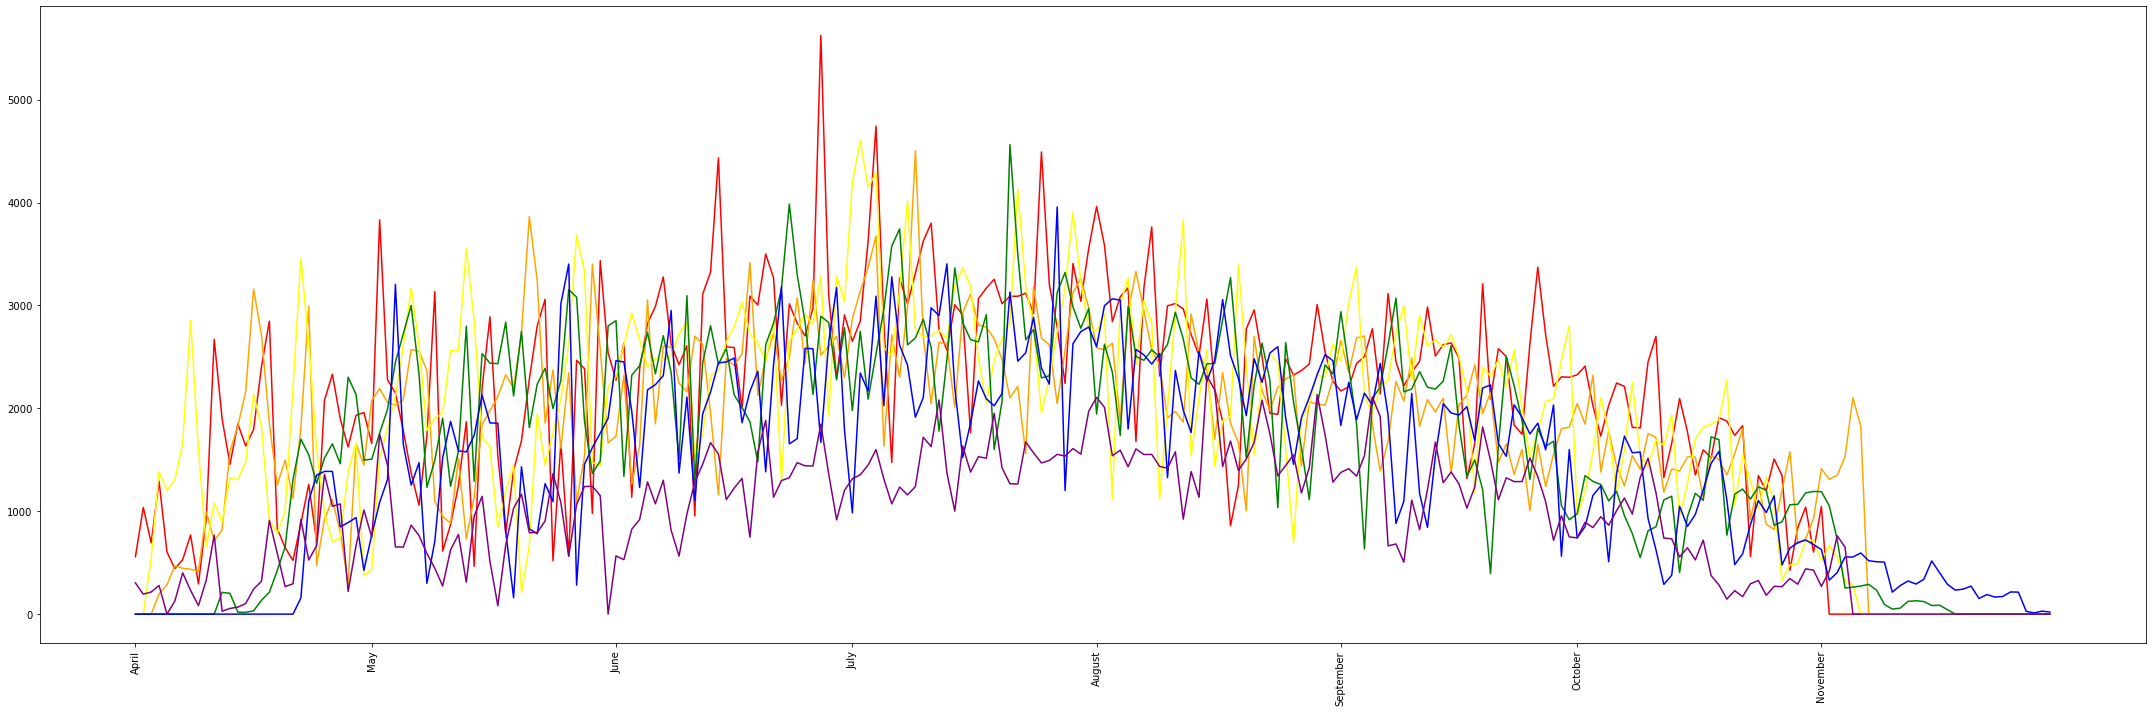

In [58]:
# Define parameters for plot by day

plt.figure(figsize=(30,10))
#2015
x_2015 = np.arange(1,245,1)
y_2015 = rides_by_month["2015"]
plt.plot(x_2015, y_2015, label="2015", color="red")
#2016
x_2016 = np.arange(1,245,1)
y_2016 = rides_by_month["2016"]
plt.plot(x_2016, y_2016, label ="2016", color="orange")
#2017
x_2017 = np.arange(1,245,1)
y_2017 = rides_by_month["2017"]
plt.plot(x_2017, y_2017, label="2017", color="yellow")
#2018
x_2018 = np.arange(1,245,1)
y_2018 = rides_by_month["2018"]
plt.plot(x_2018, y_2018, label="2018", color="green")
#2019
x_2019 = np.arange(1,245,1)
y_2019 = rides_by_month["2019"]
plt.plot(x_2019, y_2019, label="2019", color="blue")
#2020
x_2020 = np.arange(1,245,1)
y_2020 = rides_by_month["2020"]
plt.plot(x_2020, y_2020, label="2020", color="purple")

plt.xticks(month_locations, month_labels, rotation="vertical")

plt.tight_layout()
plt.show()

In [59]:
# Define x_ticks for Mpls even timeline in 2020
import matplotlib.ticker as ticker

Apr = 1
# 4/6 - Nice Ride season begins
tick1 = 6
# 4/18 - Outdoor recreation allowed
tick2 = 18
# 4/26 - Some non-critical workers can return to work
tick3 = 26
May = 31
# 5/25 - Death of George Floyd
tick4 = 30 + 25
# 5/26 - Protests begin
tick5 = 30 + 26
# 5/27 - Opening for outdoor service for bars and restaurants
tick6 = 30 + 27
# 5/28 - National Guard activated
tick7 = 30 + 28
June = 62
# 6/9 - Allows for limited reopening
tick8 = 30 + 31 + 9
July = 92
# 8/1 - Mayor closes indoor dining
tick9 = 30 + 31 + 30 + 31 + 1
Sep = 154
# 9/8 - First day of U of M fall semester
tick10 = 30 + 31 + 30 + 31 + 31 + 8
Oct = 184
Nov = 215
# 11/4 - Nice Ride season ends
tick11 = 30 + 31 + 30 + 31 + 31 + 30 + 31 + 4

x_tick_locations = np.array([Apr, tick1, tick2, tick3, May, tick7, June, tick8, July, tick9, Sep, tick10, Oct, Nov, tick11])
print(x_tick_locations)  

xtick_labels = np.array(["April", "Nice Ride season begins", "Outdoor recreation allowed", 
                         "Non-critical workers return to work", "May", "Death of George Floyd", "June",
                         "Limited reopening", "July", "August - Mayor closes indoor dining", "September",
                         "First day of fall semester", "October", "November", "Nice Ride season ends"])

[  1   6  18  26  31  58  62  70  92 123 154 161 184 215 218]


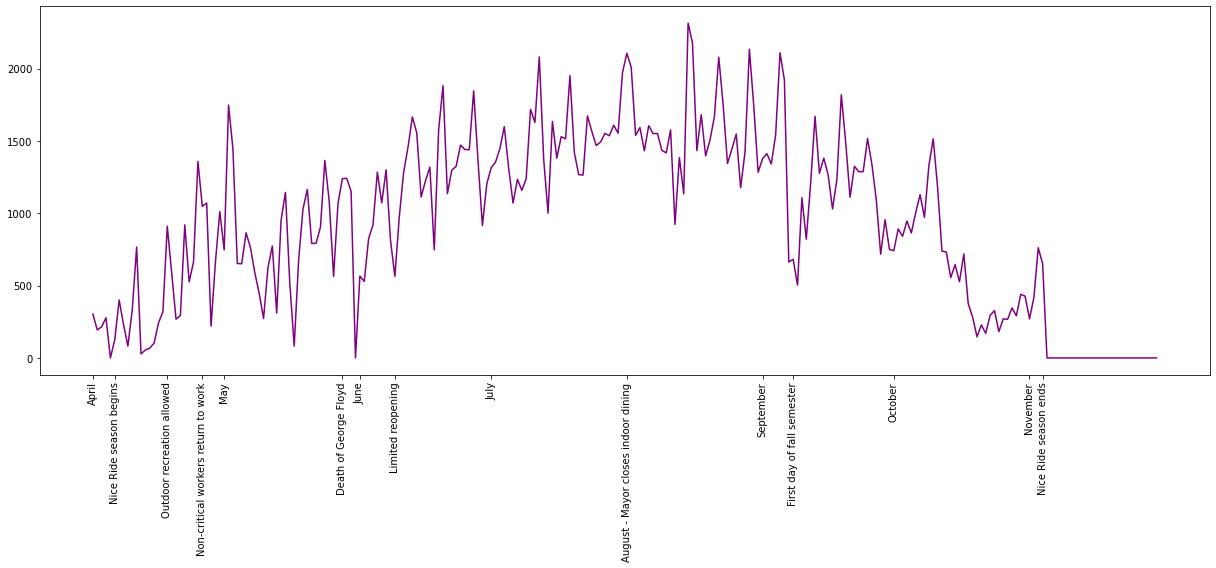

In [60]:
plt.figure(figsize=(17,8))
x_axis = np.arange(1,245,1)
y_values = rides_by_month["2020"]
plt.plot(x_axis, y_values, color="purple")

plt.xticks(x_tick_locations, xtick_labels, rotation="vertical")
plt.tight_layout()
plt.show()

# This is the end of the Steph section

# Luis' code - Monthly Ridership Line Plots

In [61]:
# 2015
by_month_2015 = df_2015[["start_datetime", "month"]].groupby("month").count()
by_month_2015.rename(columns = {"start_datetime": "2015"}, inplace = True)
by_month_2015

,2015
month,
4,40381
5,57247
6,84519
7,95638
8,80558
9,72543
10,51296
11,1047


In [62]:
# 2016
by_month_2016 = df_2016[["start_datetime", "month"]].groupby("month").count()
by_month_2016.rename(columns = {"start_datetime": "2016"}, inplace = True)
by_month_2016

,2016
month,
4,33457
5,62987
6,71716
7,84330
8,69528
9,57310
10,43420
11,9526


In [63]:
# 2017
by_month_2017 = df_2017[["start_datetime", "month"]].groupby("month").count()
by_month_2017.rename(columns = {"start_datetime": "2017"}, inplace = True)
by_month_2017

,2017
month,
4,39694
5,61165
6,77014
7,95566
8,70822
9,71422
10,42691
11,2344


In [64]:
# 2018
by_month_2018 = df_2018[["start_datetime", "month"]].groupby("month").count()
by_month_2018.rename(columns = {"start_datetime": "2018"}, inplace = True)
by_month_2018

,2018
month,
4,18303
5,66882
6,74349
7,86008
8,71734
9,56692
10,33384
11,5071


In [65]:
# 2019
by_month_2019 = df_2019[["start_datetime", "month"]].groupby("month").count()
by_month_2019.rename(columns = {"start_datetime": "2019"}, inplace = True)
by_month_2019

,2019
month,
4,8483
5,45684
6,65038
7,75289
8,72641
9,52800
10,29581
11,9191


In [66]:
# 2018
by_month_2020 = df_2020[["start_datetime", "month"]].groupby("month").count()
by_month_2020.rename(columns = {"start_datetime": "2020"}, inplace = True)
by_month_2020

,2020
month,
4,13296
5,25646
6,36115
7,45929
8,49371
9,37243
10,19377
11,2100


In [67]:
# Join dataframes using concat

rides_by_month = pd.concat([by_month_2015, by_month_2016, by_month_2017, by_month_2018, by_month_2019, by_month_2020], axis = 1)

# Set index to the months

months_list = ["April", "May", "June", "July", "August", "September", "October", "November"]

rides_by_month.index = months_list

rides_by_month

,2015,2016,2017,2018,2019,2020
April,40381,33457,39694,18303,8483,13296
May,57247,62987,61165,66882,45684,25646
June,84519,71716,77014,74349,65038,36115
July,95638,84330,95566,86008,75289,45929
August,80558,69528,70822,71734,72641,49371
September,72543,57310,71422,56692,52800,37243
October,51296,43420,42691,33384,29581,19377
November,1047,9526,2344,5071,9191,2100


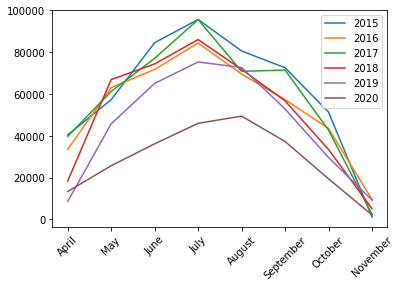

In [68]:
rides_by_month.plot(kind = "line")
plt.legend(loc = "upper right")
plt.xticks(rotation = 45)
plt.show()

# This is the Rachel section - begin here

In [69]:
ride_count_2015 = len(year_2015)
ride_count_2016 = len(year_2016)
ride_count_2017 = len(year_2017)
ride_count_2018 = len(year_2018)
ride_count_2019 = len(year_2019)
ride_count_2020 = len(year_2020)

<BarContainer object of 6 artists>

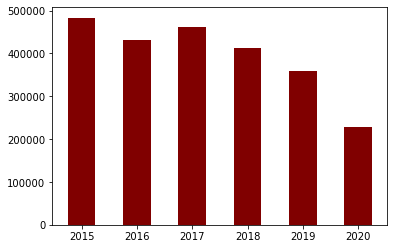

In [70]:

total_ridership_by_year = {'2015' : ride_count_2015,
                           '2016' : ride_count_2016,
                           '2017' : ride_count_2017,
                           '2018' : ride_count_2018,
                           '2019' : ride_count_2019,
                           '2020' : ride_count_2020
                          }

years = list(total_ridership_by_year.keys())
rides = list(total_ridership_by_year.values())

plt.bar(years, rides, color = 'maroon', width = .5)

In [72]:
#later try to make a scatter plot by month
# rides_2015 = rides_by_month["2015"].tolist()
# rides_2016 = rides_by_month["2016"].tolist()
# rides_2017 = rides_by_month["2017"].tolist()
# rides_2018 = rides_by_month["2018"].tolist()
# rides_2019 = rides_by_month["2019"].tolist()
# rides_2020 = rides_by_month["2020"].tolist()

# plt.scatter()

#plt.scatter(year,ride)

In [73]:
#convert string to integer
#years = list(map(int,years))
#years = [1,2,3,4,5,6]
#years

In [113]:
#convert dictionary to dataframe
total_ridership_by_year_df = pd.DataFrame(list(total_ridership_by_year.items()), columns = ['year','ride'])

#trying to test positive regression
#total_ridership_by_year_df = pd.DataFrame({'year':['2015','2016','2017','2018','2019','2020'],
#                                           "ride" : ['229077','358707','412423','460718','432274','483229']})


each_year = total_ridership_by_year_df["year"].astype(str).astype(int)
total_rides = total_ridership_by_year_df["ride"].astype(str).astype(int)

total_rides

#total_ridership_by_year_df


0    483229
1    432274
2    460718
3    412423
4    358707
5    229077
Name: ride, dtype: int32

In [114]:
print(f"The correlation coefficient is {round(st.pearsonr(each_year,total_rides)[0],2)}")

The correlation coefficient is -0.89


In [115]:

cap_slope, cap_intercept, cap_r, cap_p, cap_std_err = st.linregress(each_year, total_rides)

print (f'linear regression: \n   slope = {cap_slope}\n   intercept = {cap_intercept}\n   rvalue = {cap_r}\n   pvalue = {cap_p}\n   std error = {cap_std_err}')

linear regression: 
   slope = -43993.02857142857
   intercept = 89152006.47619048
   rvalue = -0.8912720186680604
   pvalue = 0.017089982079490175
   std error = 11191.576147658716


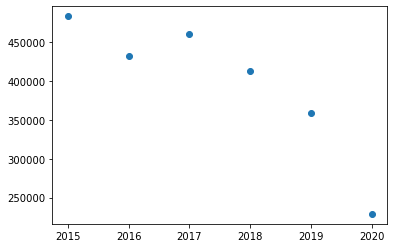

In [116]:
year = total_ridership_by_year_df.iloc[:,0]
ride = total_ridership_by_year_df.iloc[:,1]

plt.scatter(year, ride)

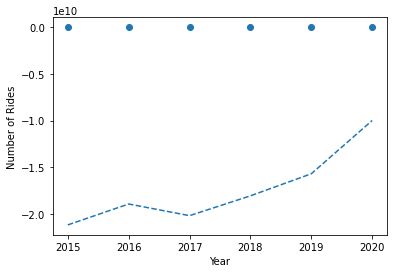

In [117]:
year = total_ridership_by_year_df.iloc[:,0]
ride = total_ridership_by_year_df.iloc[:,1]

plt.scatter(year, ride)

#plot the linear model on top of scatter plot
fit = cap_slope * ride + cap_intercept

plt.plot(year, fit, "--")

#label
plt.xlabel('Year')
plt.ylabel('Number of Rides')

plt.show()

#heat map of start locations

# This is the Rachel section - end here